# Car Price Prediction

#### Import neccessary libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV

#### import data

In [3]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### understanding data

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.shape

(301, 9)

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

#### Handling missing Duplicated data

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### Drop the duplicated data

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(299, 9)

#### Statastical Summary

In [14]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Year,299.000000,2013.615385,2.896868,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,299.000000,4.589632,4.984240,0.100000,0.850000,3.510000,6.000000,35.000000
Present_Price,299.000000,7.541037,8.566332,0.320000,1.200000,6.100000,9.840000,92.600000
Driven_kms,299.000000,36916.752508,39015.170352,500.000000,15000.000000,32000.000000,48883.500000,500000.000000
Owner,299.000000,0.043478,0.248720,0.000000,0.000000,0.000000,0.000000,3.000000


## EDA & Data visualization

#### Pairwise correlation heatmap

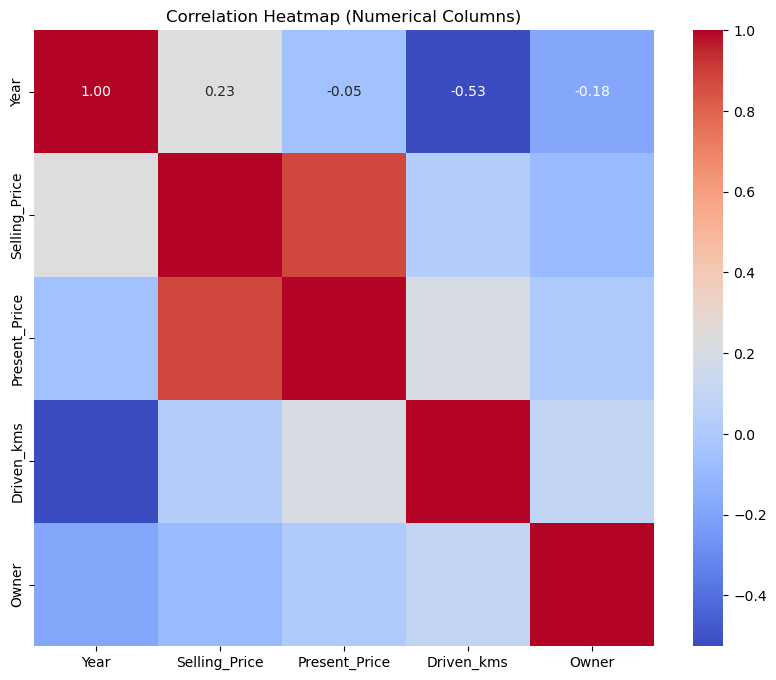

In [16]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

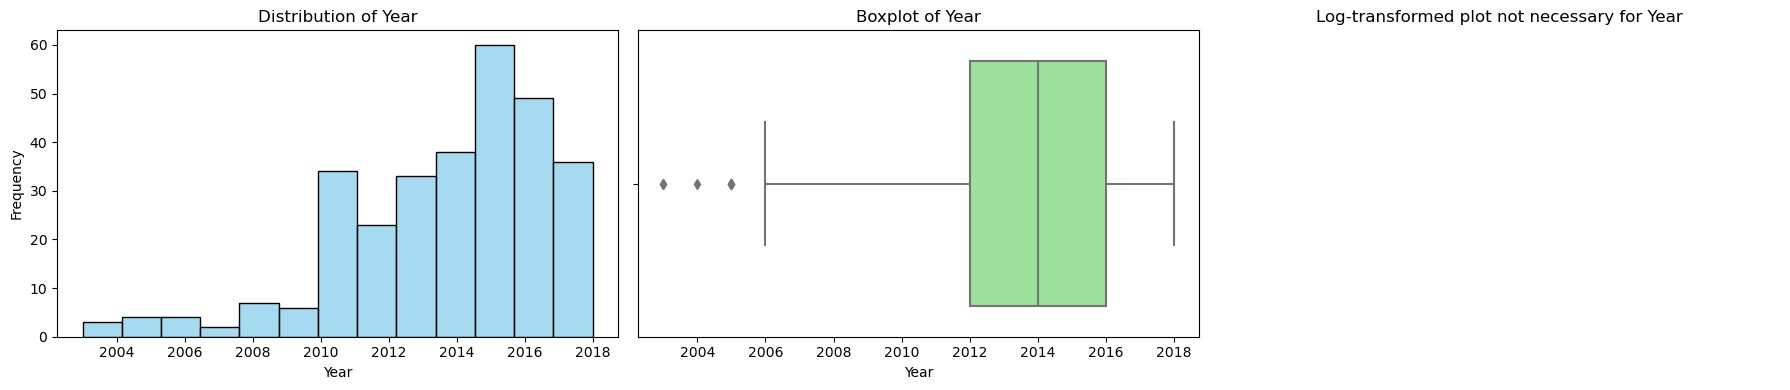

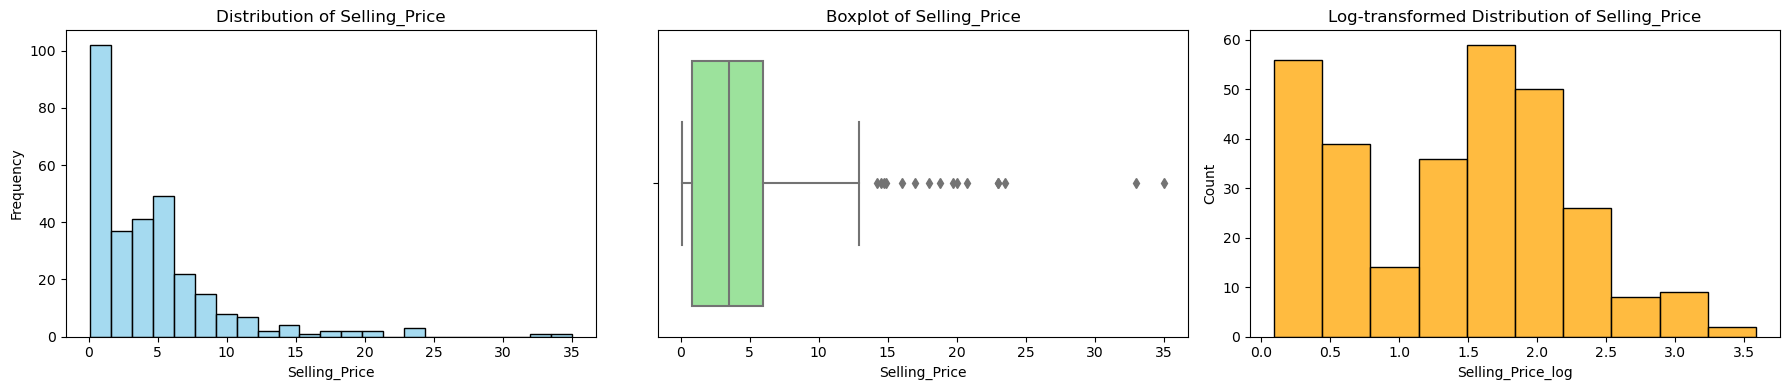

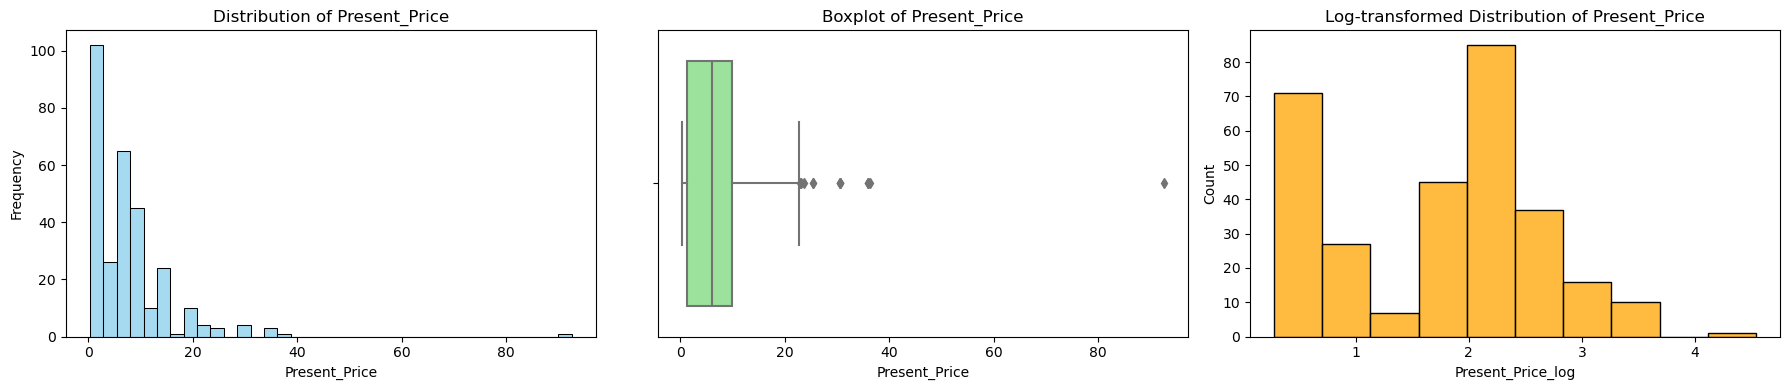

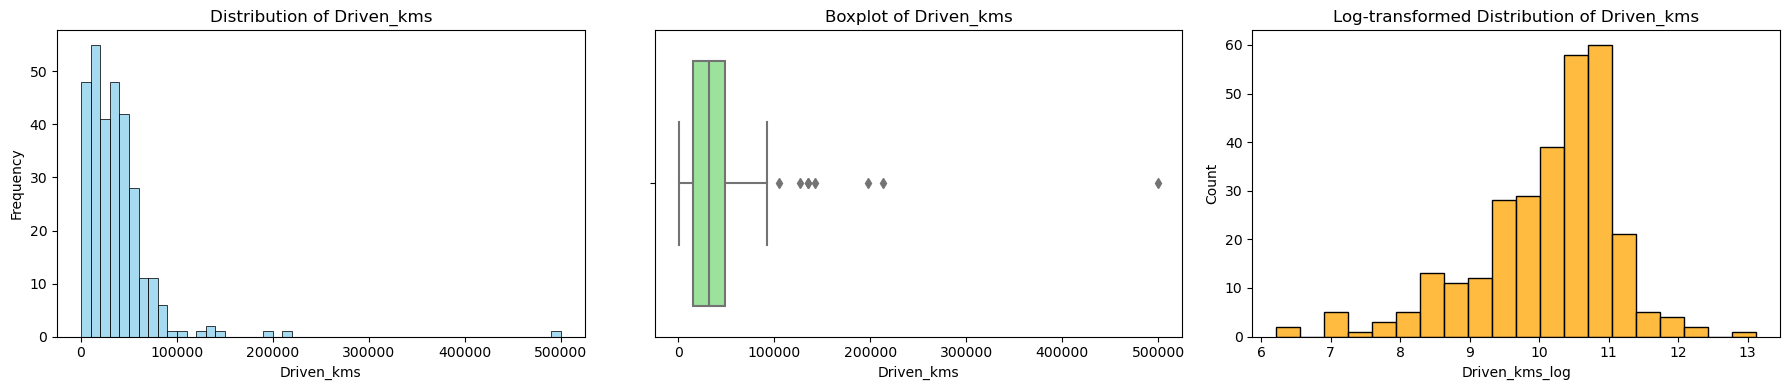

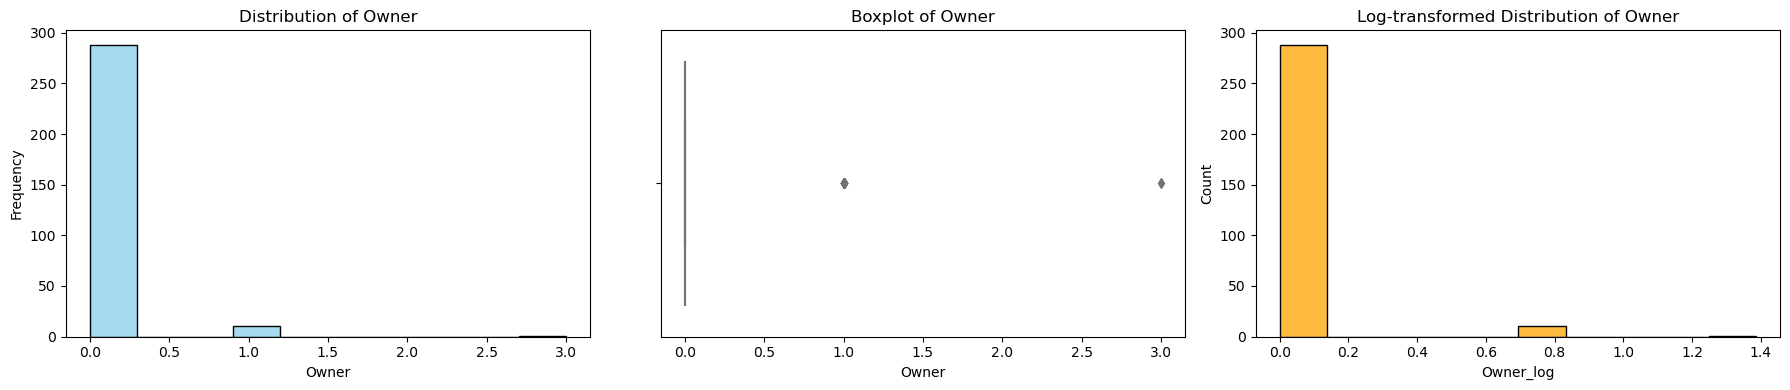

In [17]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()


### scatter and pair plots

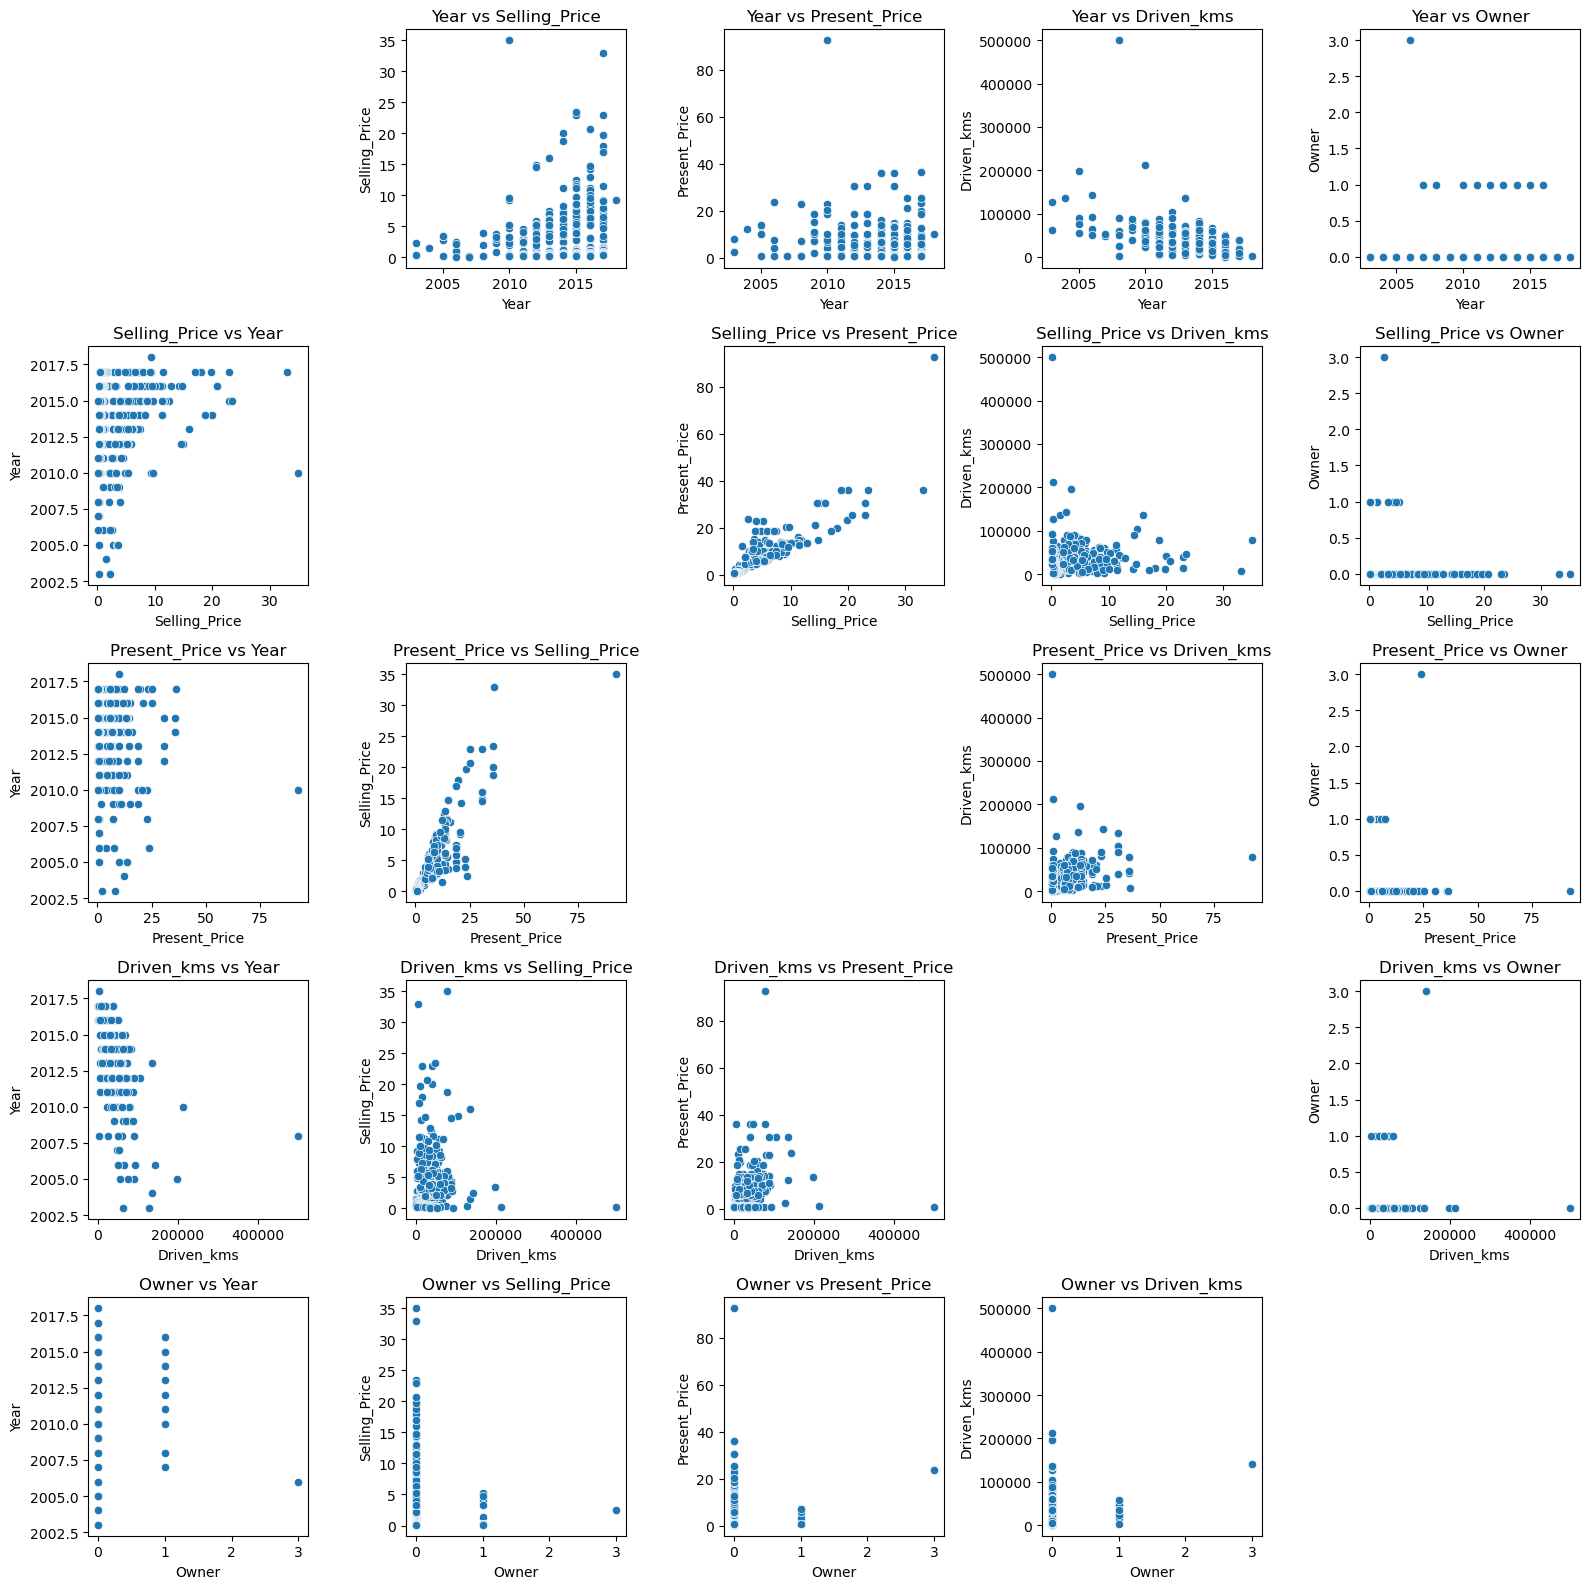

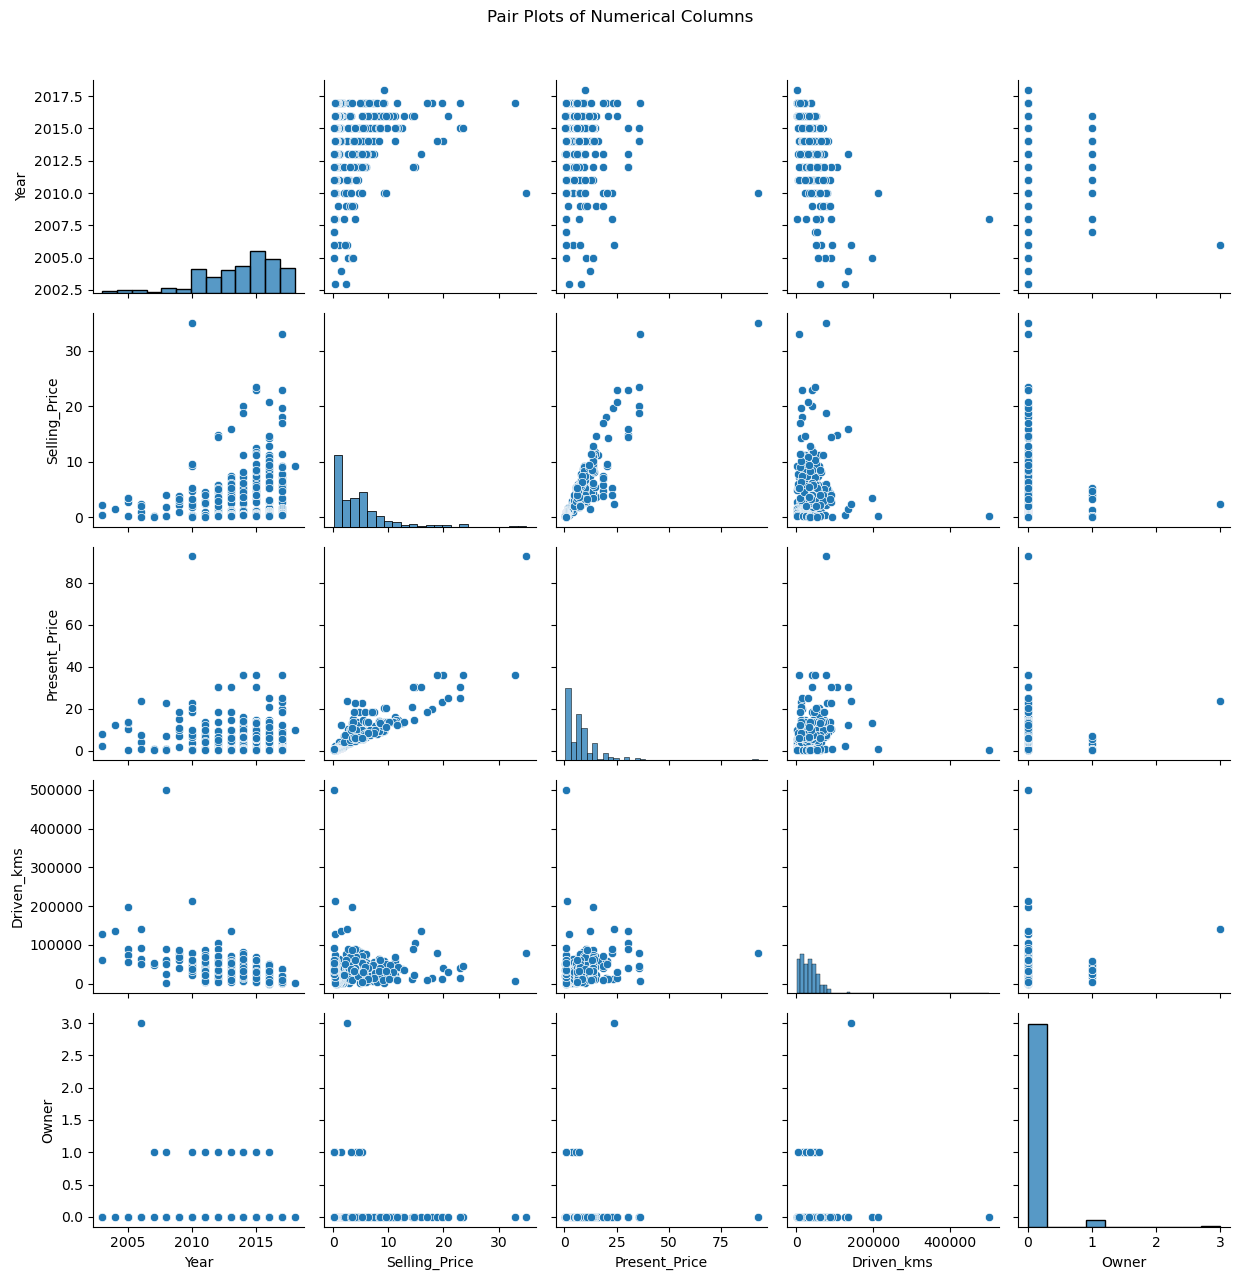

In [18]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)

#### Encoding

In [20]:
drop_col=['Car_Name']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [21]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Fuel_Type':
['Petrol' 'Diesel' 'CNG']

Unique values in 'Selling_type':
['Dealer' 'Individual']

Unique values in 'Transmission':
['Manual' 'Automatic']



#### One-Hot encoding

In [23]:
df1 = pd.get_dummies(df, columns=object_columns)

In [24]:
df1

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,True,False,True,False,False,True
297,2015,4.00,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,False,True,True,False,False,True
298,2009,3.35,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,False,True,True,False,False,True
299,2017,11.50,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,True,False,True,False,False,True


In [25]:
df1.shape

(299, 16)

In [26]:
y=df1['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [27]:
X = df1.drop(['Selling_Price'],axis=1)
X

,Year,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,False,True,True,False,False,True
1,2013,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,True,False,True,False,False,True
2,2017,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,False,True,True,False,False,True
3,2011,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,False,True,True,False,False,True
4,2014,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,True,False,True,False,False,True
297,2015,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,False,True,True,False,False,True
298,2009,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,False,True,True,False,False,True
299,2017,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,True,False,True,False,False,True


#### Feature selection

Top features based on correlation: ['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Year', 'Driven_kms_log', 'Owner_log', 'Owner', 'Driven_kms', 'Fuel_Type_CNG']
Top features based on mutual information: ['Selling_Price_log', 'Present_Price_log', 'Present_Price', 'Selling_type_Individual', 'Selling_type_Dealer', 'Year', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Driven_kms', 'Driven_kms_log', 'Transmission_Manual', 'Transmission_Automatic', 'Owner_log', 'Owner', 'Fuel_Type_CNG']
Top features based on Lasso regression: ['Present_Price', 'Driven_kms']


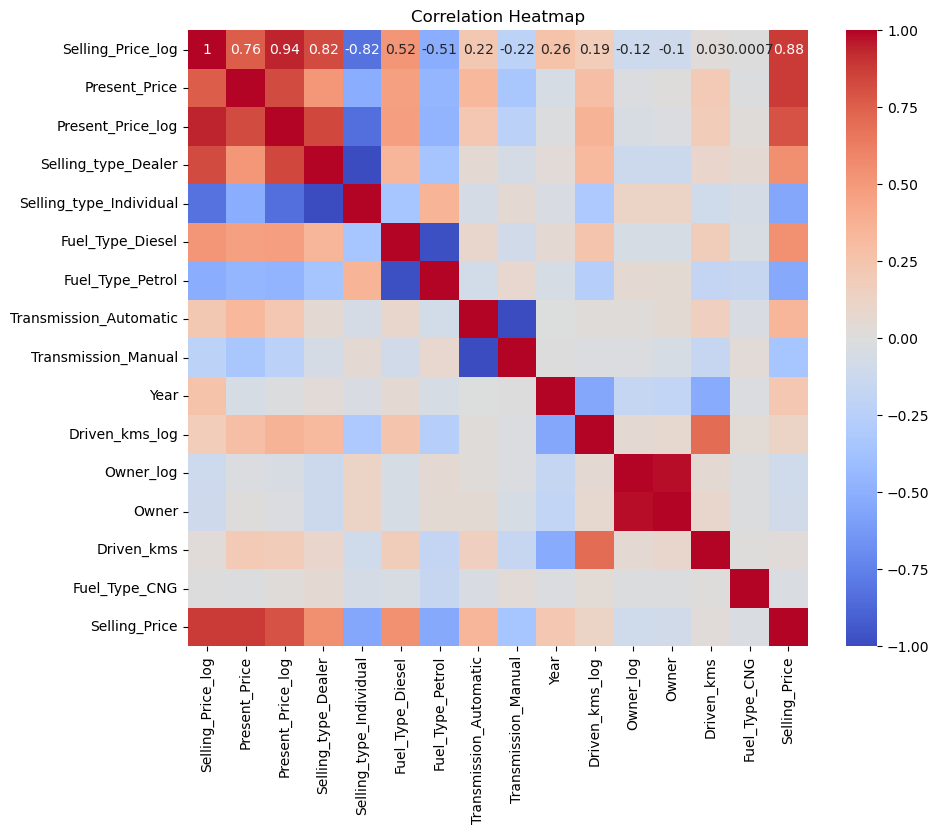

In [29]:
def correlation_analysis(df1, target):
    correlations = df1.corr()[target].drop(target)
    top_features = correlations.abs().sort_values(ascending=False).index.tolist()
    return top_features, correlations

def mutual_information(df1, target):
    X = df1.drop(columns=[target])
    y = df1[target]
    mi = mutual_info_regression(X, y)
    mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi_series.index.tolist(), mi_series

def lasso_feature_selection(df1, target):
    X = df1.drop(columns=[target])
    y = df1[target]
    lasso = LassoCV(cv=5, random_state=0)
    lasso.fit(X, y)
    coef = pd.Series(lasso.coef_, index=X.columns)
    top_features = coef[coef != 0].index.tolist()
    return top_features, coef
def plot_correlation_heatmap(df1, top_features, target):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df1[top_features + [target]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
target = 'Selling_Price'  

# Correlation Analysis
top_features_corr, correlations = correlation_analysis(df1, target)
print("Top features based on correlation:", top_features_corr)

# Mutual Information
top_features_mi, mi_series = mutual_information(df1, target)
print("Top features based on mutual information:", top_features_mi)

# Lasso Regression
top_features_lasso, coef = lasso_feature_selection(df1, target)
print("Top features based on Lasso regression:", top_features_lasso)
plot_correlation_heatmap(df1, top_features_corr, target)


In [30]:
print(df1.columns)

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Selling_Price_log', 'Present_Price_log', 'Driven_kms_log', 'Owner_log',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')


### Feature Scaling

In [32]:
TopF=['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Year', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Driven_kms_log', 'Transmission_Manual', 'Transmission_Automatic', 'Owner', 'Fuel_Type_CNG', 'Owner_log']
x=df1[TopF]

In [33]:
def remove_redundant_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced, to_drop
threshold = 0.9 
x, dropped_features = remove_redundant_features(x, threshold)

print("Dropped Features:", dropped_features)
print("Reduced DataFrame shape:", x.shape)

Dropped Features: ['Present_Price_log', 'Selling_type_Individual', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Owner_log']
Reduced DataFrame shape: (299, 10)


In [34]:
x

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
0,1.470176,5.59,True,2014,27000,False,10.203629,True,0,False
1,1.749200,9.54,True,2013,43000,True,10.668979,True,0,False
2,2.110213,9.85,True,2017,6900,False,8.839422,True,0,False
3,1.348073,4.15,True,2011,5200,False,8.556606,True,0,False
4,1.722767,6.87,True,2014,42450,True,10.656106,True,0,False
...,...,...,...,...,...,...,...,...,...,...
296,2.351375,11.60,True,2016,33988,True,10.433792,True,0,False
297,1.609438,5.90,True,2015,60000,False,11.002117,True,0,False
298,1.470176,11.00,True,2009,87934,False,11.384353,True,0,False
299,2.525729,12.50,True,2017,9000,True,9.105091,True,0,False


In [35]:
x.columns

Index(['Selling_Price_log', 'Present_Price', 'Selling_type_Dealer', 'Year',
       'Driven_kms', 'Fuel_Type_Diesel', 'Driven_kms_log',
       'Transmission_Manual', 'Owner', 'Fuel_Type_CNG'],
      dtype='object')

In [36]:
X = x.drop(['Selling_Price_log', 'Present_Price','Selling_type_Dealer', 'Driven_kms_log','Owner', 'Fuel_Type_CNG'],axis=1)
X

,Year,Driven_kms,Fuel_Type_Diesel,Transmission_Manual
0,2014,27000,False,True
1,2013,43000,True,True
2,2017,6900,False,True
3,2011,5200,False,True
4,2014,42450,True,True
...,...,...,...,...
296,2016,33988,True,True
297,2015,60000,False,True
298,2009,87934,False,True
299,2017,9000,True,True


In [37]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['Year', 'Driven_kms']
scaler = MinMaxScaler()
X[non_boolean_numerical_features] = scaler.fit_transform(X[non_boolean_numerical_features])


In [38]:
X

,Year,Driven_kms,Fuel_Type_Diesel,Transmission_Manual
0,0.733333,0.053053,False,True
1,0.666667,0.085085,True,True
2,0.933333,0.012813,False,True
3,0.533333,0.009409,False,True
4,0.733333,0.083984,True,True
...,...,...,...,...
296,0.866667,0.067043,True,True
297,0.800000,0.119119,False,True
298,0.400000,0.175043,False,True
299,0.933333,0.017017,True,True


In [39]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

### Splitting data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
X_train

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
6,2.047693,8.12,True,2015,18796,False,9.841453,True,0,False
185,0.223144,0.58,False,2008,1900,False,7.550135,False,0,False
187,0.223144,0.51,False,2013,32000,False,10.373522,True,0,False
148,0.418710,0.94,False,2010,45000,False,10.714440,True,0,False
31,1.208960,4.89,True,2011,54200,False,10.900455,True,0,False
...,...,...,...,...,...,...,...,...,...,...
190,0.182322,0.75,False,2008,60000,False,11.002117,True,0,False
72,2.134166,18.61,True,2013,56001,False,10.933143,True,0,False
108,0.788457,1.50,False,2016,18000,False,9.798183,True,0,False
272,2.140066,10.00,True,2015,27600,False,10.225607,True,0,False


In [43]:
y_train

6      6.75
185    0.25
187    0.25
148    0.52
31     2.35
       ... 
190    0.20
72     7.45
108    1.20
272    7.50
104    1.35
Name: Selling_Price, Length: 239, dtype: float64

### Training and evalution of model

## LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [47]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 1.193066278945374
Testing MSE: 5.9633965184462925
Training R2 Score: 0.9513131484019373
Testing R2 Score: 0.7686208107057346


## KNN

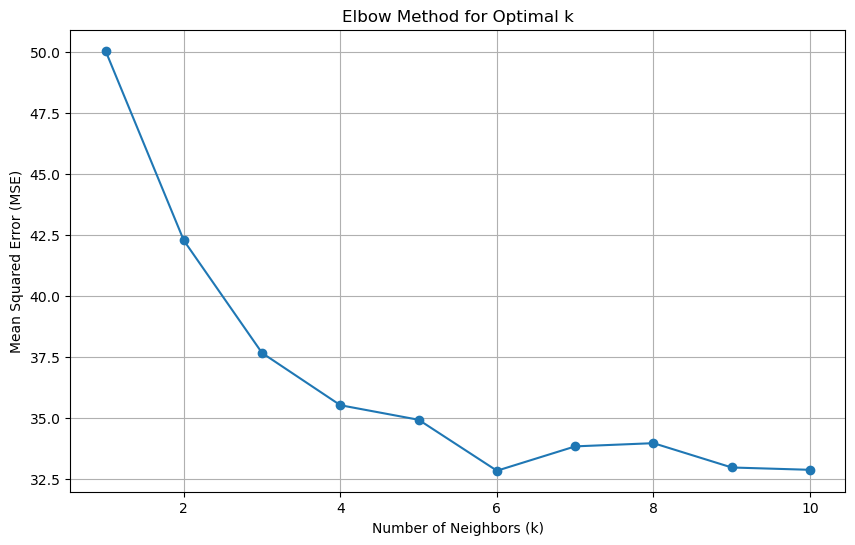

In [49]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [50]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 6


In [51]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=6)

In [52]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [53]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 17.75086191306369
Testing MSE: 32.838061759259254
Training R2 Score: 0.27561980842926304
Testing R2 Score: -0.2741135164079316


## DecisionTreeRegressor

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [56]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

In [57]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.019918479776847978
Testing MSE: 1.6885785185185178
Training R2 Score: 0.9991871632900298
Testing R2 Score: 0.9344833221359696


## RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [60]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(max_depth=5)

In [61]:
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 0.11817876711830355
Testing MSE: 1.0984671356706646
Training R2 Score: 0.9951773407745487
Testing R2 Score: 0.957379584850398


### XGBRegressor

In [63]:
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
xgb_regressor = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [64]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 3.138388740837397e-06
Testing MSE: 1.5567941836277905
Training R2 Score: 0.9999998719280986
Testing R2 Score: 0.9395965411671677


### Model comparison

In [67]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,1.193066e+00,5.963397,0.951313,0.768621
1,Decision Tree,1.095927e-34,1.570915,1.000000,0.939049
2,Random Forest,6.810271e-02,0.934459,0.997221,0.963743
3,XGBoost,2.055078e-06,1.564247,1.000000,0.939307


## Conclusion

Decision Tree and Random Forest models perform exceptionally well, with the Decision Tree model having the highest R2 scores but potential overfitting concerns, while the Random Forest and XGBoost models balance performance and generalization. ### Linear Regression, although simpler, shows limitations in handling the complexity of the data compared to ensemble methods like Random Forest and XGBoost